<center> <h1>CNN-ICP (CNN Image Classification Project)</h1> </center>

## 1.Import libraries

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

<a href="https://www.cs.toronto.edu/~kriz/cifar.html"> <h2> 2.Load The dataset </h2> </a>


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
# Shape of the training data, which is a 4D array with dimensions (50000, 32, 32, 3).
print(f"X_train shape: {X_train.shape}")
# Shape of the testing data, which is a 4D array with dimensions (10000, 32, 32, 3).
print(f"X_test shape: {X_test.shape}")

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [4]:
# print the first 5 elements from the y_train array.
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Reshapes the y_train, y_test array into a 1D array.
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


print(f"y_train: {y_train[:5]}")

print(f"y_test: {y_test[:5]}")

y_train: [6 9 9 4 1]
y_test: [3 8 8 0 6]


In [6]:
# List of class names for the CIFAR-10 dataset.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def plot_sample(X, y, index):
    """
    Plot a single image from the dataset with its corresponding label.

    Args:
    - X (ndarray): Array of images with shape (num_samples, height, width, num_channels).
    - y (ndarray): Array of labels with shape (num_samples,).
    - index (int): Index of the sample to plot.

    Returns:
    - None (displays a plot).
    """
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])
    plt.axis('off')
    plt.title(f"Label: {class_names[y[index]]}")
    plt.show()

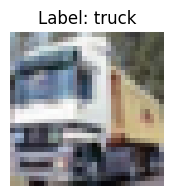

In [8]:
plot_sample(X_train, y_train, 1)

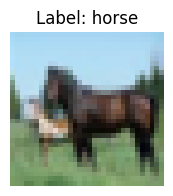

In [9]:
plot_sample(X_train, y_train, 12)

## 3.Normalizing the training data

In [10]:
# Normalizes the pixel values in the training data by dividing them by 255.0.
# This ensures that the pixel values are scaled to a range between 0 and 1, which can help improve the performance of the model.
X_train = X_train / 255.0
X_test = X_test / 255.0

## 4.Training the Model

In [11]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [15]:
# Set up a directory to store TensorBoard logs
LOGS_DIR = 'logs'
if not os.path.exists(LOGS_DIR):
    os.mkdir(LOGS_DIR)


# Create a TensorBoard callback to log training metrics during model training
callback = tf.keras.callbacks.TensorBoard(log_dir=LOGS_DIR, histogram_freq=1)
# 1. %load_ext tensorboard
# 2. %tensorboard --logdir logs/fit

In [16]:
EPOCHS = 50

# Train the model on the training data for 50 epochs, using a batch size of 64 and validation data of the test set
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=64, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
141/782 [====>.........................] - ETA: 2:25 - loss: 2.0355 - accuracy: 0.3816

KeyboardInterrupt: 

In [14]:
history.history.keys()

NameError: name 'history' is not defined

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:

def plot_history(history, metric='accuracy', title=None, xlabel='Epoch', ylabel=None, legend=['Training', 'Validation']):
    """
    Plots the training and validation history of a Keras model.
    
    Parameters:
    - history: A Keras History object.
    - metric: The metric to plot, either 'accuracy' or 'loss'. Default is 'accuracy'.
    - title: The title of the plot. If None, a default title is used.
    - xlabel: The label of the x-axis. Default is 'Epoch'.
    - ylabel: The label of the y-axis. If None, a default label is used.
    - legend: A list of strings to use as labels for the legend. The first string is used for the training data,
              and the second string is used for the validation data. Default is ['Training', 'Validation'].
    """
    
    if metric not in ['accuracy', 'loss']:
        raise ValueError("metric must be either 'accuracy' or 'loss'")
        
    # Get the training and validation data for the specified metric
    train_data = history.history[metric]
    val_data = history.history['val_'+metric]
    
    # Set default title and ylabel if not specified
    if title is None:
        title = 'Training and Validation ' + metric.capitalize()
    if ylabel is None:
        ylabel = metric.capitalize()
    
    # Plot the data
    epochs = range(1, len(train_data) + 1)
    plt.plot(epochs, train_data, 'go-', label=legend[0])
    plt.plot(epochs, val_data, 'g', label=legend[1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [ ]:
plot_history(history)

# Plot the training and validation loss
plot_history(history, metric='loss', ylabel='Loss', legend=['Training Loss', 'Validation Loss'])

In [19]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8034 - accuracy: 0.7219


[0.8034170269966125, 0.7218999862670898]

In [20]:
# Use the trained model to predict the classes of the test set
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.37944506e-03, 4.53281464e-05, 8.11237004e-03, 7.63166368e-01,
        6.07121328e-04, 2.08601311e-01, 1.10012395e-02, 1.00537320e-03,
        3.91693087e-03, 1.64439756e-04],
       [2.46374705e-03, 1.57315489e-02, 2.25115130e-07, 1.00930549e-07,
        8.67839489e-09, 6.35783814e-10, 1.19926935e-09, 1.40829515e-09,
        9.81167257e-01, 6.37090707e-04],
       [6.73929155e-02, 1.12227701e-01, 4.07150714e-04, 1.18803408e-03,
        2.76916864e-04, 1.12764305e-04, 1.01126199e-04, 5.20420785e-04,
        7.89234877e-01, 2.85380557e-02],
       [7.81507432e-01, 2.56801629e-03, 6.27773209e-03, 7.23351608e-04,
        3.44539946e-03, 1.13703987e-04, 5.77079445e-05, 6.81180507e-04,
        2.02821434e-01, 1.80398230e-03],
       [8.03827561e-07, 1.01547703e-05, 1.34106753e-02, 2.24541295e-02,
        3.06050360e-01, 1.58078945e-03, 6.56483769e-01, 5.19405785e-06,
        3.43389115e-06, 6.82815369e-07]], dtype=float32)

In [21]:
# Find the predicted labels for each test sample
y_pre_labels = [np.argmax(element) for element in y_pred]
# Map the predicted labels to their corresponding class names
y_pre_names = [class_names[p] for p in y_pre_labels]

print(f"y_pre_labels : {y_pre_labels[:10]}")
print(f"y_pre_names : {y_pre_names[:10]}")


y_pre_labels : [3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
y_pre_names : ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [22]:
y_test_names = [class_names[p] for p in y_test]

print(f"y_test_labels : {y_test[:10]}")
print(f"y_test_names : {y_test_names[:10]}")

y_test_labels : [3 8 8 0 6 6 1 6 3 1]
y_test_names : ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


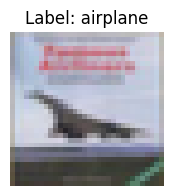

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
# Create a confusion matrix using the predicted labels and true labels of the test set
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[742,  22,  44,  16,  11,   9,  11,   7, 110,  28],
       [ 18, 859,   5,   7,   2,   2,  11,   2,  28,  66],
       [ 74,   9, 621,  52,  71,  65,  62,  25,  16,   5],
       [ 29,  10,  92, 474,  58, 188,  72,  33,  21,  23],
       [ 27,   2,  97,  58, 644,  29,  56,  68,  16,   3],
       [ 13,   4,  73, 160,  43, 624,  23,  39,  14,   7],
       [  6,   6,  50,  49,  35,  20, 815,   3,  12,   4],
       [ 18,   2,  39,  42,  57,  62,   2, 760,   5,  13],
       [ 44,  26,  12,   8,   5,   3,   3,   2, 879,  18],
       [ 24,  91,  10,   8,   7,   5,   6,  10,  38, 801]])>

In [25]:
import seaborn as sn

def plot_confusion_matrix(cm):
    """
    Plot a confusion matrix using a heatmap with annotations.

    Args:
    - cm (array): Confusion matrix to plot.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

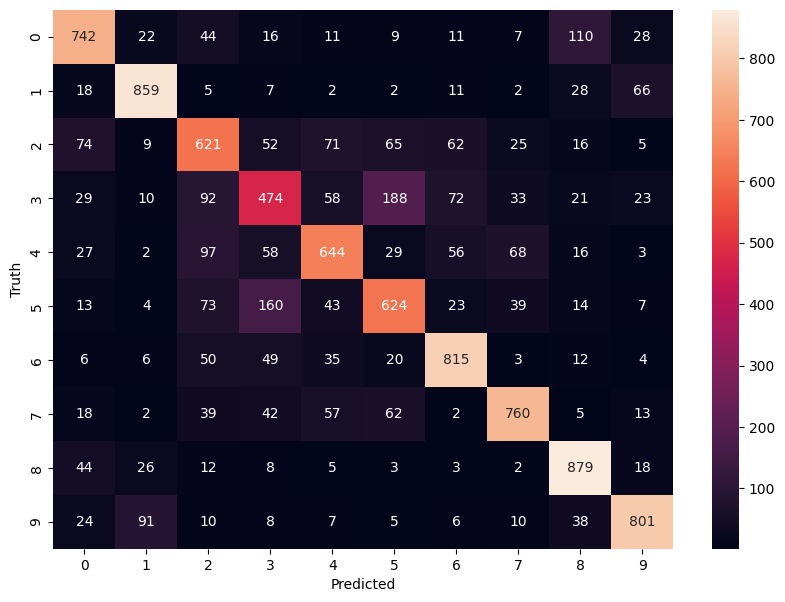

In [26]:
plot_confusion_matrix(cm=cm)

## Save the model

In [ ]:
# Save the model
model.save('cifar10_model.h5')

## save images form x_test data

In [ ]:
(_, _), (x_image, x_lab) = datasets.cifar10.load_data()

In [ ]:
import cv2

IMAGE_DIR = 'images'
if not os.path.exists(IMAGE_DIR):
    os.mkdir(IMAGE_DIR)


def save_image_from_test(index):
    file_path = os.path.join(IMAGE_DIR, f'{class_names[x_lab[index][0]]}_{index}.png')
    # Plot the image
    cv2.imwrite(file_path,x_image[index])

In [ ]:
for idx in range(1,100):
    save_image_from_test(idx)